Year and months                                     2
Italy industrial production                         0
Italy exchange rates relative to the US dollar      0
Italy consumer prices                               0
Italy international reserves and liquidity          0
none1                                             405
none2                                             405
none3                                             405
none4                                             405
none5                                             405
none6                                             405
none7                                             405
none8                                             405
none9                                             405
none10                                              2
US consumer prices                                  0
US international reserves and liquidity             0
none11                                            405
none12                      

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


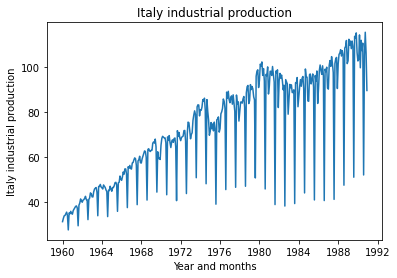

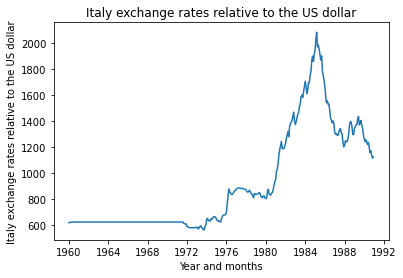

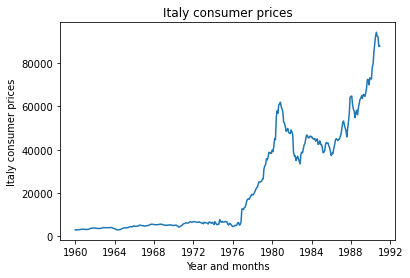

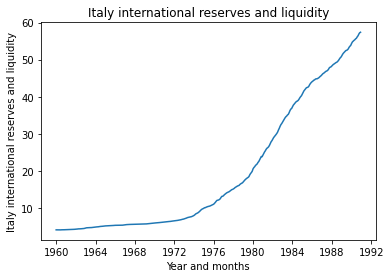

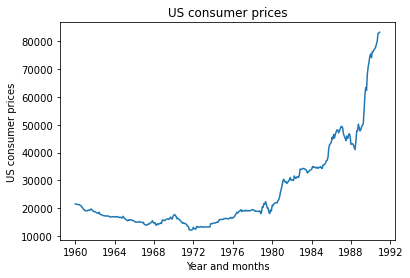

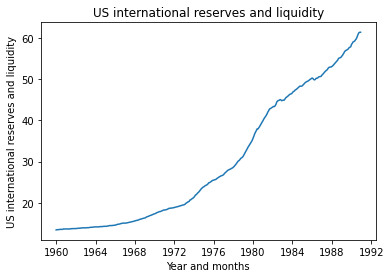

In [49]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime

#Here we import and merge the main data sets
data_for_italy = pd.read_excel(r'/Users/maxlilian/data_for_Italy_EC1B1.xlsx')
data_for_US = pd.read_excel(r'/Users/maxlilian/Downloads/data_US_EC1B1.xlsx')
merged_data_set = pd.concat([data_for_italy, data_for_US], axis=1)



merged_data_set.columns = ['Year and months', 'Italy industrial production', 'Italy exchange rates relative to the US dollar', 'Italy consumer prices','Italy international reserves and liquidity', 'none1', 'none2', 'none3', 'none4', 'none5', 'none6', 'none7', 'none8', 'none9', 'none10', 'US consumer prices', 'US international reserves and liquidity', 'none11', 'none12', 'none13', 'none14', 'none15']
print(merged_data_set.isnull().sum())
#Here, we checked where there was missing values in the data
#There were many columns with simply no data, so we called them none and suppressed them
#There also was a column where the year was repeated due to the merging of the data, so we also suppressed it


drop_columns = ['none1', 'none2', 'none3', 'none4', 'none5', 'none6', 'none7', 'none8', 'none9', 'none10', 'none11', 'none12', 'none13', 'none14', 'none15']
drop_rows = [0,1]
merged_data_set = merged_data_set.drop(drop_columns, axis = 1)
merged_data_set = merged_data_set.drop(drop_rows, axis = 0)
print()
print(merged_data_set.isnull().sum())
print()
print(merged_data_set.head(5))
print()
print()
print()
print()

#Here we convert strings to floats to be able to manipulate the data
merged_data_set['Italy industrial production'] = merged_data_set['Italy industrial production'].astype(float)
merged_data_set['Italy exchange rates relative to the US dollar'] = merged_data_set['Italy exchange rates relative to the US dollar'].astype(float) #Here we have dollars relative to italian lira, hence we have E^lira/$
merged_data_set['Italy consumer prices'] = merged_data_set['Italy consumer prices'].astype(float)
merged_data_set['Italy international reserves and liquidity'] = merged_data_set['Italy international reserves and liquidity'].astype(float)
merged_data_set['US consumer prices'] = merged_data_set['US consumer prices'].astype(float)
merged_data_set['US international reserves and liquidity'] = merged_data_set['US international reserves and liquidity'].astype(float)

pd.options.display.max_rows = 405

#After observing the full data set, we realise we want to suppress the values where there is the year only.
#The rows involved are row :
#0, 13, 26,...
#So we will create a list with all these rows we want to suppress and then suppress them
drop_years = []
for i in range(2, len(merged_data_set['Year and months']), 13): #We used a step of 13 after we visualised the data
    drop_years.append(i)

merged_data_set = merged_data_set.drop(drop_years, axis = 0)

# Now we want to convert the dates into python date format
for i in range(0, len(merged_data_set)):
    merged_data_set['Year and months'].iloc[i] = datetime.strptime(merged_data_set['Year and months'].iloc[i], '%b %Y') #%b is is the directive for abbreviated month name, %Y is the directive for year with century as a decima number
print('This is the year and date format :') #We did the process above to convert strings to date format

print(merged_data_set)

#Code to identify outliers

plt.plot(merged_data_set['Year and months'], merged_data_set['Italy industrial production'])
plt.xlabel('Year and months')
plt.title('Italy industrial production')
plt.ylabel('Italy industrial production')
plt.show()

#Constructing variables for Italy


log_exchange_rate = []
for elements in merged_data_set['Italy exchange rates relative to the US dollar']:
    log_exchange_rate.append(math.log(elements))

#Real exchange rate growth is calculated using the difference in log variables, hence ce percentage increase or decrease on the month is equal to the difference between log variables.
difference_in_log_exchange_rate = []
for i in range (0,len(log_exchange_rate)-1):
    difference_in_log_exchange_rate.append(log_exchange_rate[i+1]-log_exchange_rate[i])

#To calculate the monthly inflation rate we consider the difference in log prices
log_consumer_prices_italy = []
for elements in merged_data_set['Italy consumer prices']:
    log_consumer_prices_italy.append(math.log(elements))

monthly_inflation_rate_italy = []
for i in range (0,len(log_consumer_prices_italy)-1):
    monthly_inflation_rate_italy.append(log_consumer_prices_italy[i+1]-log_consumer_prices_italy[i])

log_industrial_production=[]
for elements in merged_data_set['Italy industrial production']:
    log_industrial_production.append(math.log(elements))
    
monthly_growth_in_industrial_production = []
for i in range (0,len(log_industrial_production)-1):
    monthly_growth_in_industrial_production.append(log_industrial_production[i+1]-log_industrial_production[i])

growth_in_industrial_production_vs_12_months = []#We do -11 for the index not to be out of range
for i in range (0,len(log_industrial_production)-12):
    growth_in_industrial_production_vs_12_months.append(log_industrial_production[i+12]-log_industrial_production[i])

index_value_of_reserves_italy = []
for elements in merged_data_set['Italy international reserves and liquidity']:
    index_value_of_reserves_italy.append(elements/merged_data_set['Italy international reserves and liquidity'].iloc[0]) #We scale the index to the value of the Italian reserves in Jan 1960
    

#Constructing variables for the US

log_consumer_prices_US = []
for elements in merged_data_set['US consumer prices']:
    log_consumer_prices_US.append(math.log(elements))
    
monthly_inflation_rate_US = []
for i in range (0,len(log_consumer_prices_US)-1):
    monthly_inflation_rate_US.append(log_consumer_prices_US[i+1]-log_consumer_prices_US[i])

index_value_of_reserves_US = []
for elements in merged_data_set['US international reserves and liquidity']:
    index_value_of_reserves_US.append(elements/merged_data_set['US international reserves and liquidity'].iloc[0]) #We scale the index to the value of the Italian reserves in Jan 1960

#Now we calculate the monthly real excgange rate growth
#Formula for real exchange rate growth : epsilon^lira/dollars = E^lira/dollars * consumer prices in US / consumer prices in Italy

real_exchange_rates = (merged_data_set['Italy exchange rates relative to the US dollar'] * merged_data_set['US consumer prices'])/merged_data_set['Italy consumer prices'] 

#Now we calculate the log and difference them to find the percentage change in real exchange rates 
log_real_exchange_rates = []
for elements in real_exchange_rates:
    log_real_exchange_rates.append(math.log(elements))
    
real_exchange_rate_growth = []
for i in range(0, len(log_real_exchange_rates)-1):
    real_exchange_rate_growth.append(log_real_exchange_rates[i+1] - log_real_exchange_rates[i])

#Now, we are going to plot everything to observe the data and see if there is any missing or incoherent data

plt.plot(merged_data_set['Year and months'], merged_data_set['Italy exchange rates relative to the US dollar'])
plt.xlabel('Year and months')
plt.title('Italy exchange rates relative to the US dollar')
plt.ylabel('Italy exchange rates relative to the US dollar')
plt.show()

plt.plot(merged_data_set['Year and months'], merged_data_set['Italy consumer prices'])
plt.xlabel('Year and months')
plt.title('Italy consumer prices')
plt.ylabel('Italy consumer prices')
plt.show()

plt.plot(merged_data_set['Year and months'], merged_data_set['Italy international reserves and liquidity'])
plt.xlabel('Year and months')
plt.title('Italy international reserves and liquidity')
plt.ylabel('Italy international reserves and liquidity')
plt.show()

plt.plot(merged_data_set['Year and months'], merged_data_set['US consumer prices'])
plt.xlabel('Year and months')
plt.title('US consumer prices')
plt.ylabel('US consumer prices')
plt.show()

plt.plot(merged_data_set['Year and months'], merged_data_set['US international reserves and liquidity'])
plt.xlabel('Year and months')
plt.title('US international reserves and liquidity')
plt.ylabel('US international reserves and liquidity')
plt.show()


    

    
    
